## Plotting the tangent line of a function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

*Exercise*: Plot the function $f(x) = x^2$ in the interval $[-1,3]$ and its tangent line to $x_0 = 1$.

In [2]:
x = np.linspace(-1,3,100)
y = x**2

The equation of the tangent line is
$$t(x) = f(x_0) + f'(x_0)(x-x_0)$$

We have $f'(x)= (x^2)' = 2x$.

Thus, in our case with $x_0 = 1$:
$$t(x) = 1^2 + 2\cdot1 (x-1) = 1 + 2\cdot(x-1).$$

In [3]:
y_tangent_line = 1 + 2*(x-1)

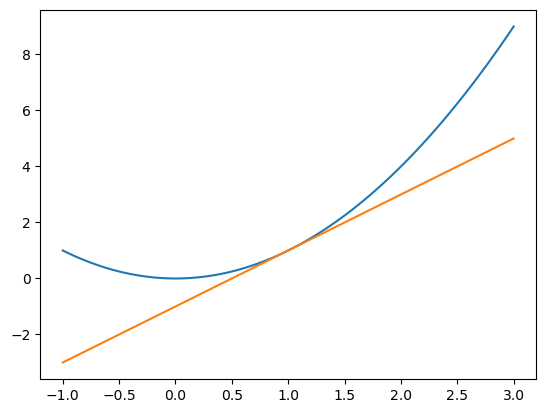

In [4]:
plt.plot(x,y)
plt.plot(x,y_tangent_line)

## Computing derivatives with SymPy

In [5]:
import sympy as sy

We start by defining some symbolic expression depending on a symbolic variable $x$ which we want to differentiate with respect to $x$, e.g.
$$f(x) = x^2+5x+4$$

In [6]:
x = sy.symbols('x')

In [7]:
f = x**2 + 5*x + 4

Then we differentiate this expression symbolically using the SymPy function `diff()`.

In [8]:
sy.diff(f)

2*x + 5

If the algebraic expression depends on more than one symbolic variable, we need to tell SymPy with respect to which variable we want to differentiate. This is done by specifying a second argument in `diff()`:

Let's differentiate the term
$$g(x) = \text{e}^{a \cdot \sin(x)}$$
with respect to $x$:

In [10]:
a = sy.symbols('a')
g = sy.exp(a*sy.sin(x))
g

exp(a*sin(x))

In [11]:
#differentiate g with respect to x
sy.diff(g, x)

a*exp(a*sin(x))*cos(x)

In order to compute higher derivatives, we can pass a natural number $n$ as a third parameter to `diff()`. For example:

In [12]:
f

x**2 + 5*x + 4

In [13]:
#compute the second derivative of f with respect to x
sy.diff(f,x,2)

2

In [14]:
sy.diff(f,x,3)

0

In [15]:
# If you specify the order of the derivative by an integer,
# you need to specify the variable of differentiation first
sy.diff(f,2)

ValueError: First variable cannot be a number: 2

In [16]:
# Alternative ways of computing a second derivative
sy.diff(sy.diff(f))

2

In [17]:
# Alternative 2
sy.diff(f,x,x)

2

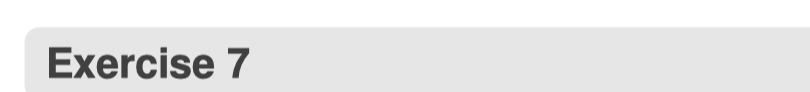

Start with verifying the formula for the derivative of $f(x) = \sqrt[6]{x}$.

In [22]:
f = x**(sy.S(1)/6)
f

x**(1/6)

In [23]:
sy.diff(f)

1/(6*x**(5/6))

1. Find an appropriate $x_0$
2. Compute the equation of the tangent  line at $x_0$
3. Evaluate the tangent line at $x = 65$ to get an approximate value of $\sqrt[6]{65}$
4. Visualize the approximation
5. Evaluate numerically the approximation error

Answer to 1.: Choose $x_0=64$. (Reason why this is an intelligent choice: (a) $64$ is close to $65$ (as opposed to e.g. $1$) and (b) $f$ can be evaluated exactly at $x_0 = 64$)

Answer to 2.: Equation of tangent line
$$t(x) = f(x_0) + f'(x_0) \cdot (x-x_0)$$

In [24]:
# Evaluate f = x**(1/6) at x0 = 64
f.subs(x,64)

2

In [26]:
# Evaluate the derivative of f = x**(1/6) at x0 = 64
sy.diff(f,x).subs(x,64)

1/192

In [27]:
t = f.subs(x,64) + sy.diff(f,x).subs(x,64)*(x-64)
t

x/192 + 5/3

Answer to 3.:

In [28]:
t.subs(x,65)

385/192

Answer to 5.:

In [29]:
# Compute difference of approximate value and exact value
(t.subs(x,65) - f.subs(x,65)).evalf()

3.35881829117921e-5